In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import re

import statsmodels.api as sm

In [3]:
sns.set(style="darkgrid")
df = pd.read_excel('/content/drive/MyDrive/vnz2019.xlsx')
df = df.drop(0, axis=0)

# Якщо ви хочете оновити індекси після видалення рядка, використовуйте reset_index:
df = df.reset_index(drop=True)
df = df.iloc[:, 1:]
df = df.dropna()
display(df)

,Номер ЄДЕБО,Назва закладу вищої освіти,Область,Середній конкурсний бал зарахованих абітурієнтів,Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням,Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом,"Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або цього закладу","Студенти, які навчаються за денною формою навчання за державним замовленням","Студенти, які навчаються за заочною формою навчання за державним замовленням","Всього студентів, які навчаються за державним замовленням\n(приведений континент)",...,Разом педагогічний та науково-педагогічний персонал,Всього персоналу,Частка непедагогічного персоналу в загальній кількості персоналу,"Касові видатки по загальному фонду (без капітальних видатків), грн",Середні видатки на одного студента (приведений контингент) за державним замовленням,"Середня кількість студентів, які навчаються за денною формою навчання за державним замовленням, на одного науково-педагогічного працівника","Касові видатки по спеціальному фонду (кошти, отримані від надання платних послуг), грн",Середні видатки на одного студента (приведений контингент) за контрактом,ГРК,КПКВК
0,41,Київський національний університет ім. Тараса ...,м.Київ,181.000,187.000,179.000,181.000,13159,461.0,13205.1,...,1831.25,4792.08,0.617859,1.021629e+09,77366.252425,7.604908,4.537932e+08,70936.222097,МОН,2201280
1,2,Донбаська національна академія будівництва і а...,Донецька область,145.845,153.859,137.830,101.500,294,47.0,298.7,...,68.245,146.745,0.534942,1.811936e+07,60660.732876,5.13582,2.768334e+06,19358.98014,МОН,2201160
2,3,Полтавський національний педагогічний універси...,Полтавська область,150.366,165.897,144.124,122.890,1362,115.0,1373.5,...,222,422.75,0.474867,6.977160e+07,50798.398253,6.692875,2.916887e+07,16322.815719,МОН,2201160
3,7,Національний університет біоресурсів і природо...,м.Київ,150.830,157.640,142.110,137.630,5911,547.0,5965.7,...,905,2003,0.548178,4.360690e+08,73096.032318,6.841435,1.738178e+08,38328.068582,МОН,2201160
4,9,Національний університет водного господарства ...,Рівненська область,157.892,166.495,150.542,139.382,3049,554.0,3104.4,...,454.5,1003,0.546859,1.241610e+08,39995.168148,7.543295,6.731752e+07,37925.362518,МОН,2201160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,3781,"ДВНЗ ""Криворізький державний педагогічний унів...",Дніпропетровська область,148.310,153.922,142.699,138.600,1564,175.0,1581.5,...,264.73,585.73,0.548034,7.481985e+07,47309.421435,6.092003,2.540316e+07,28801.773447,МОН,2201160
144,3969,Державний університет інфраструктури та технол...,м.Київ,149.000,159.000,139.000,126.820,737,169.0,753.9,...,147.07,338.67,0.565742,6.746708e+07,89490.754941,6.928645,9.419452e+07,55871.951189,МОН,2201160
156,201,Національний фармацевтичний університет,Харківська область,157.770,188.530,156.770,125.360,64,4.0,64.4,...,7.25,18.5,0.608108,2.986600e+06,46375.776398,8.827586,2.779478e+08,74040.436867,МОЗ,2301070
164,118,Одеська національна музична Академія ім. А.В.Н...,Одеська область,177.600,178.500,156.700,100.000,353,60.0,359.0,...,261.5,411.5,0.36452,5.427350e+07,151179.665738,1.39802,2.276000e+07,116658.117632,МКІП,1801060


In [4]:
# Перевірка нульових значень
df.isnull().sum()*100/df.shape[0]
# У наборі даних немає значень NULL, тому він чистий.

Номер ЄДЕБО                                                                                                                                   0.0
Назва закладу вищої освіти                                                                                                                    0.0
Область                                                                                                                                       0.0
Середній конкурсний бал зарахованих абітурієнтів                                                                                              0.0
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням                                                       0.0
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом                                                                  0.0
Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або цього закладу                      

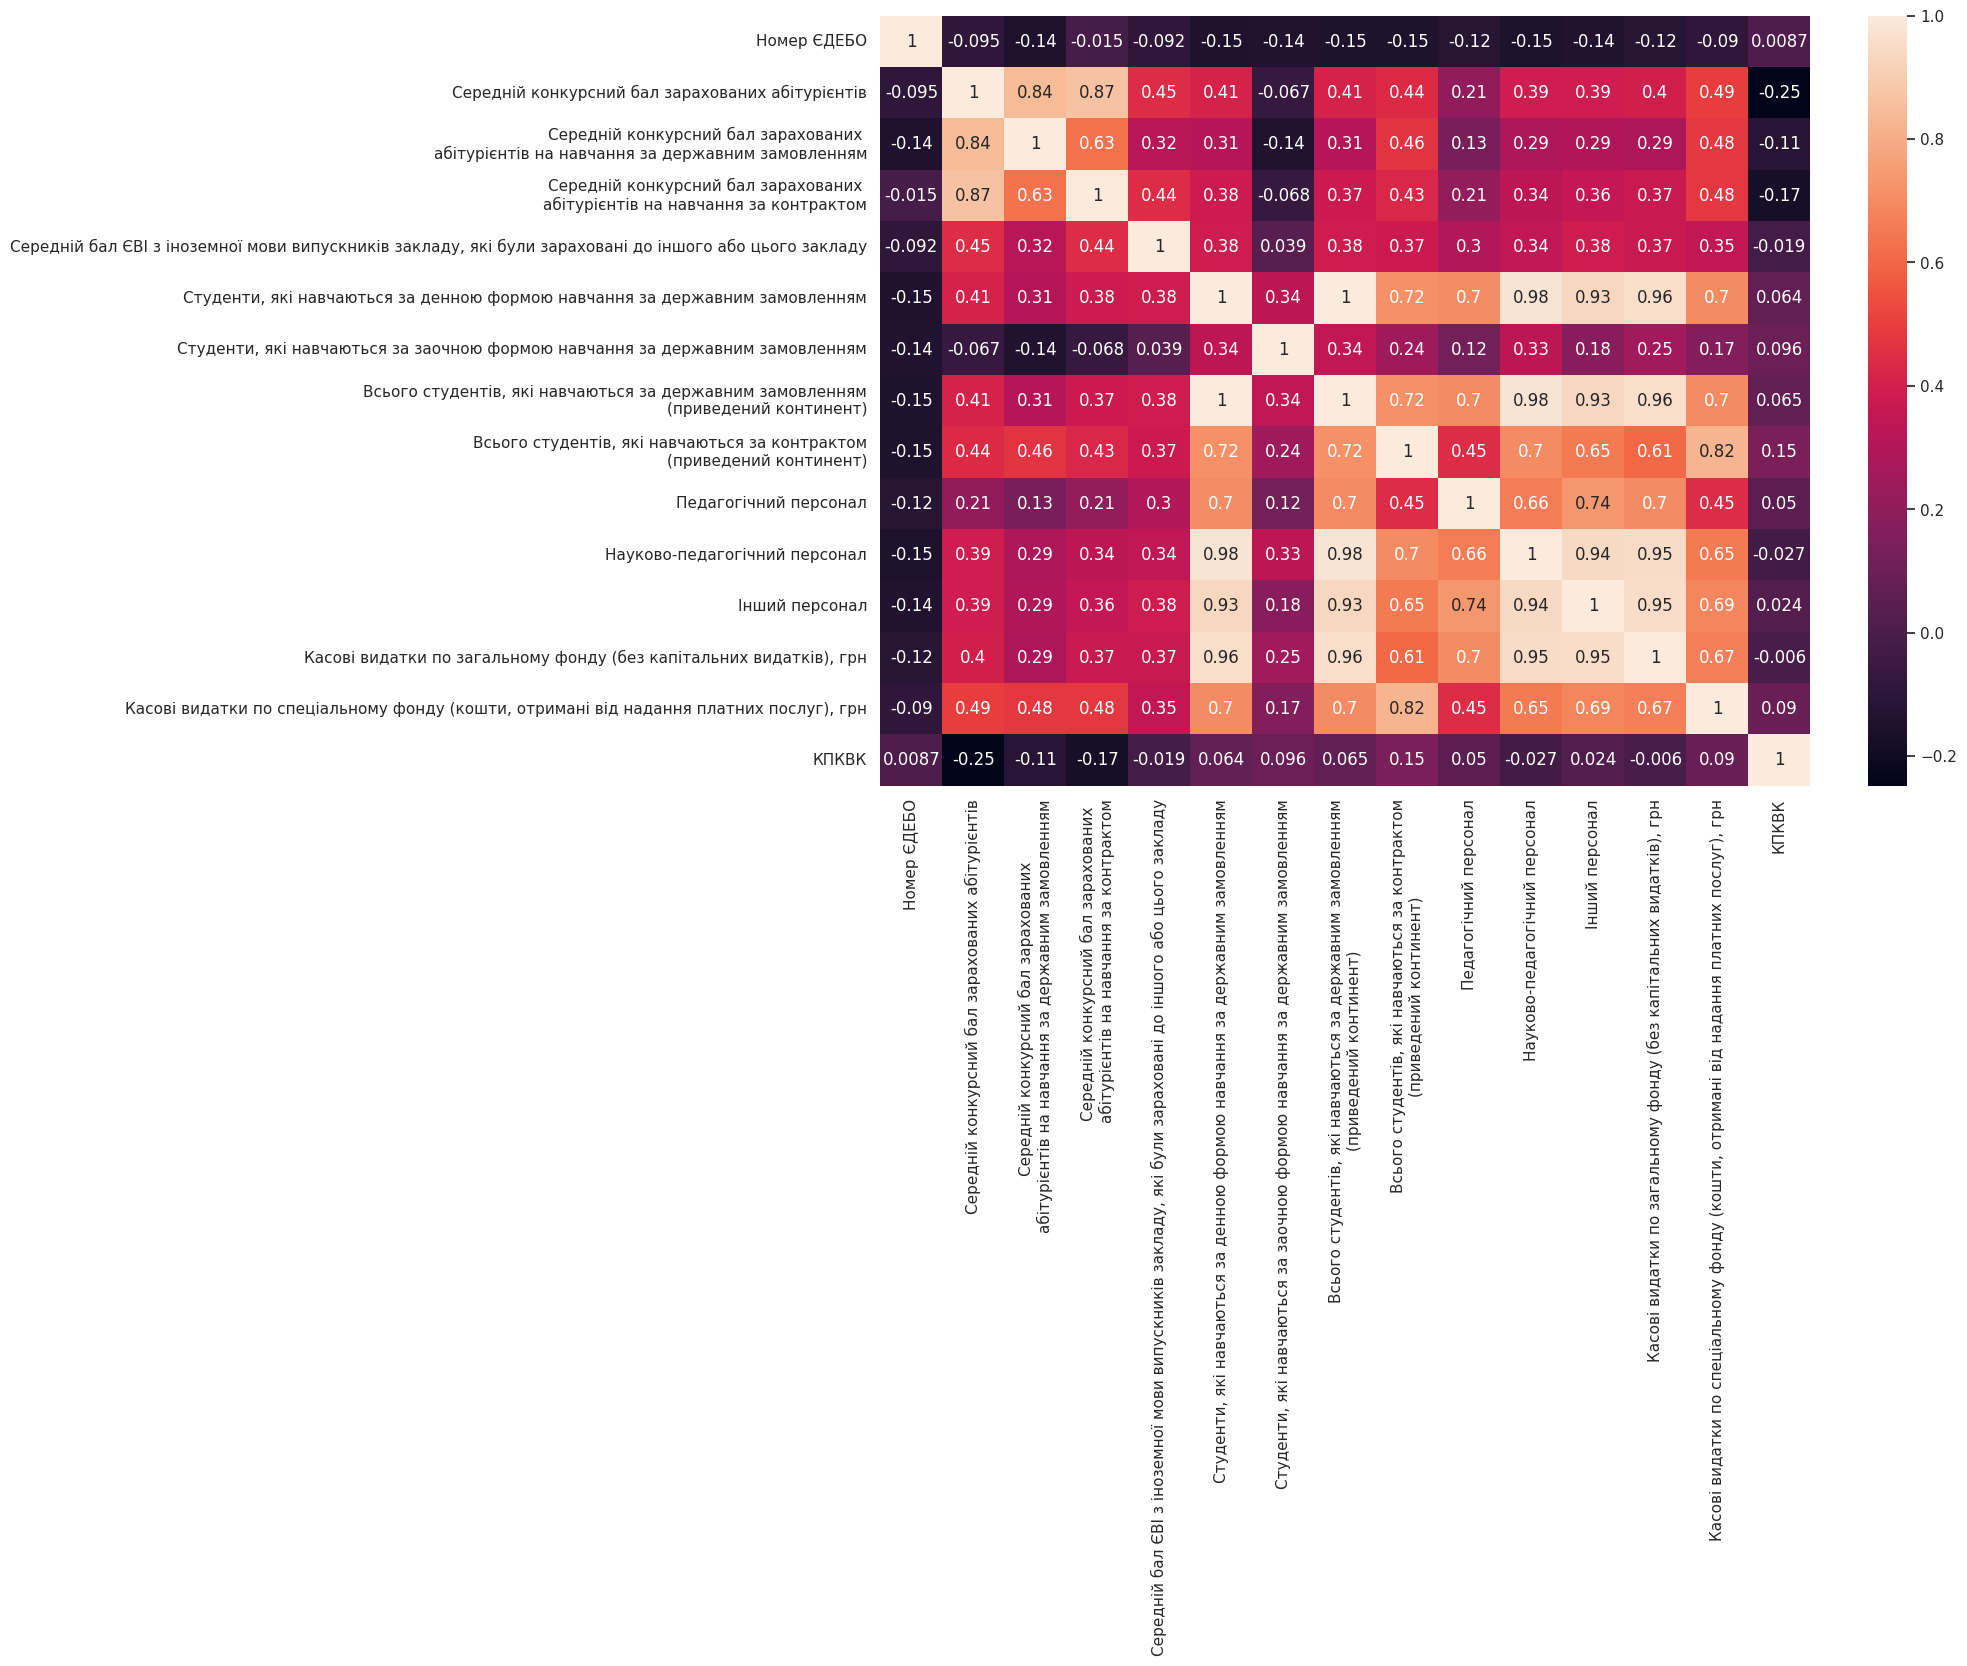

In [8]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True).figure.set_size_inches(15, 10)


Середній конкурсний бал зарахованих абітурієнтів                                           1.000000
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням    0.843523
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом               0.865024
Касові видатки по спеціальному фонду (кошти, отримані від надання платних послуг), грн     0.493844
Name: Середній конкурсний бал зарахованих абітурієнтів, dtype: float64


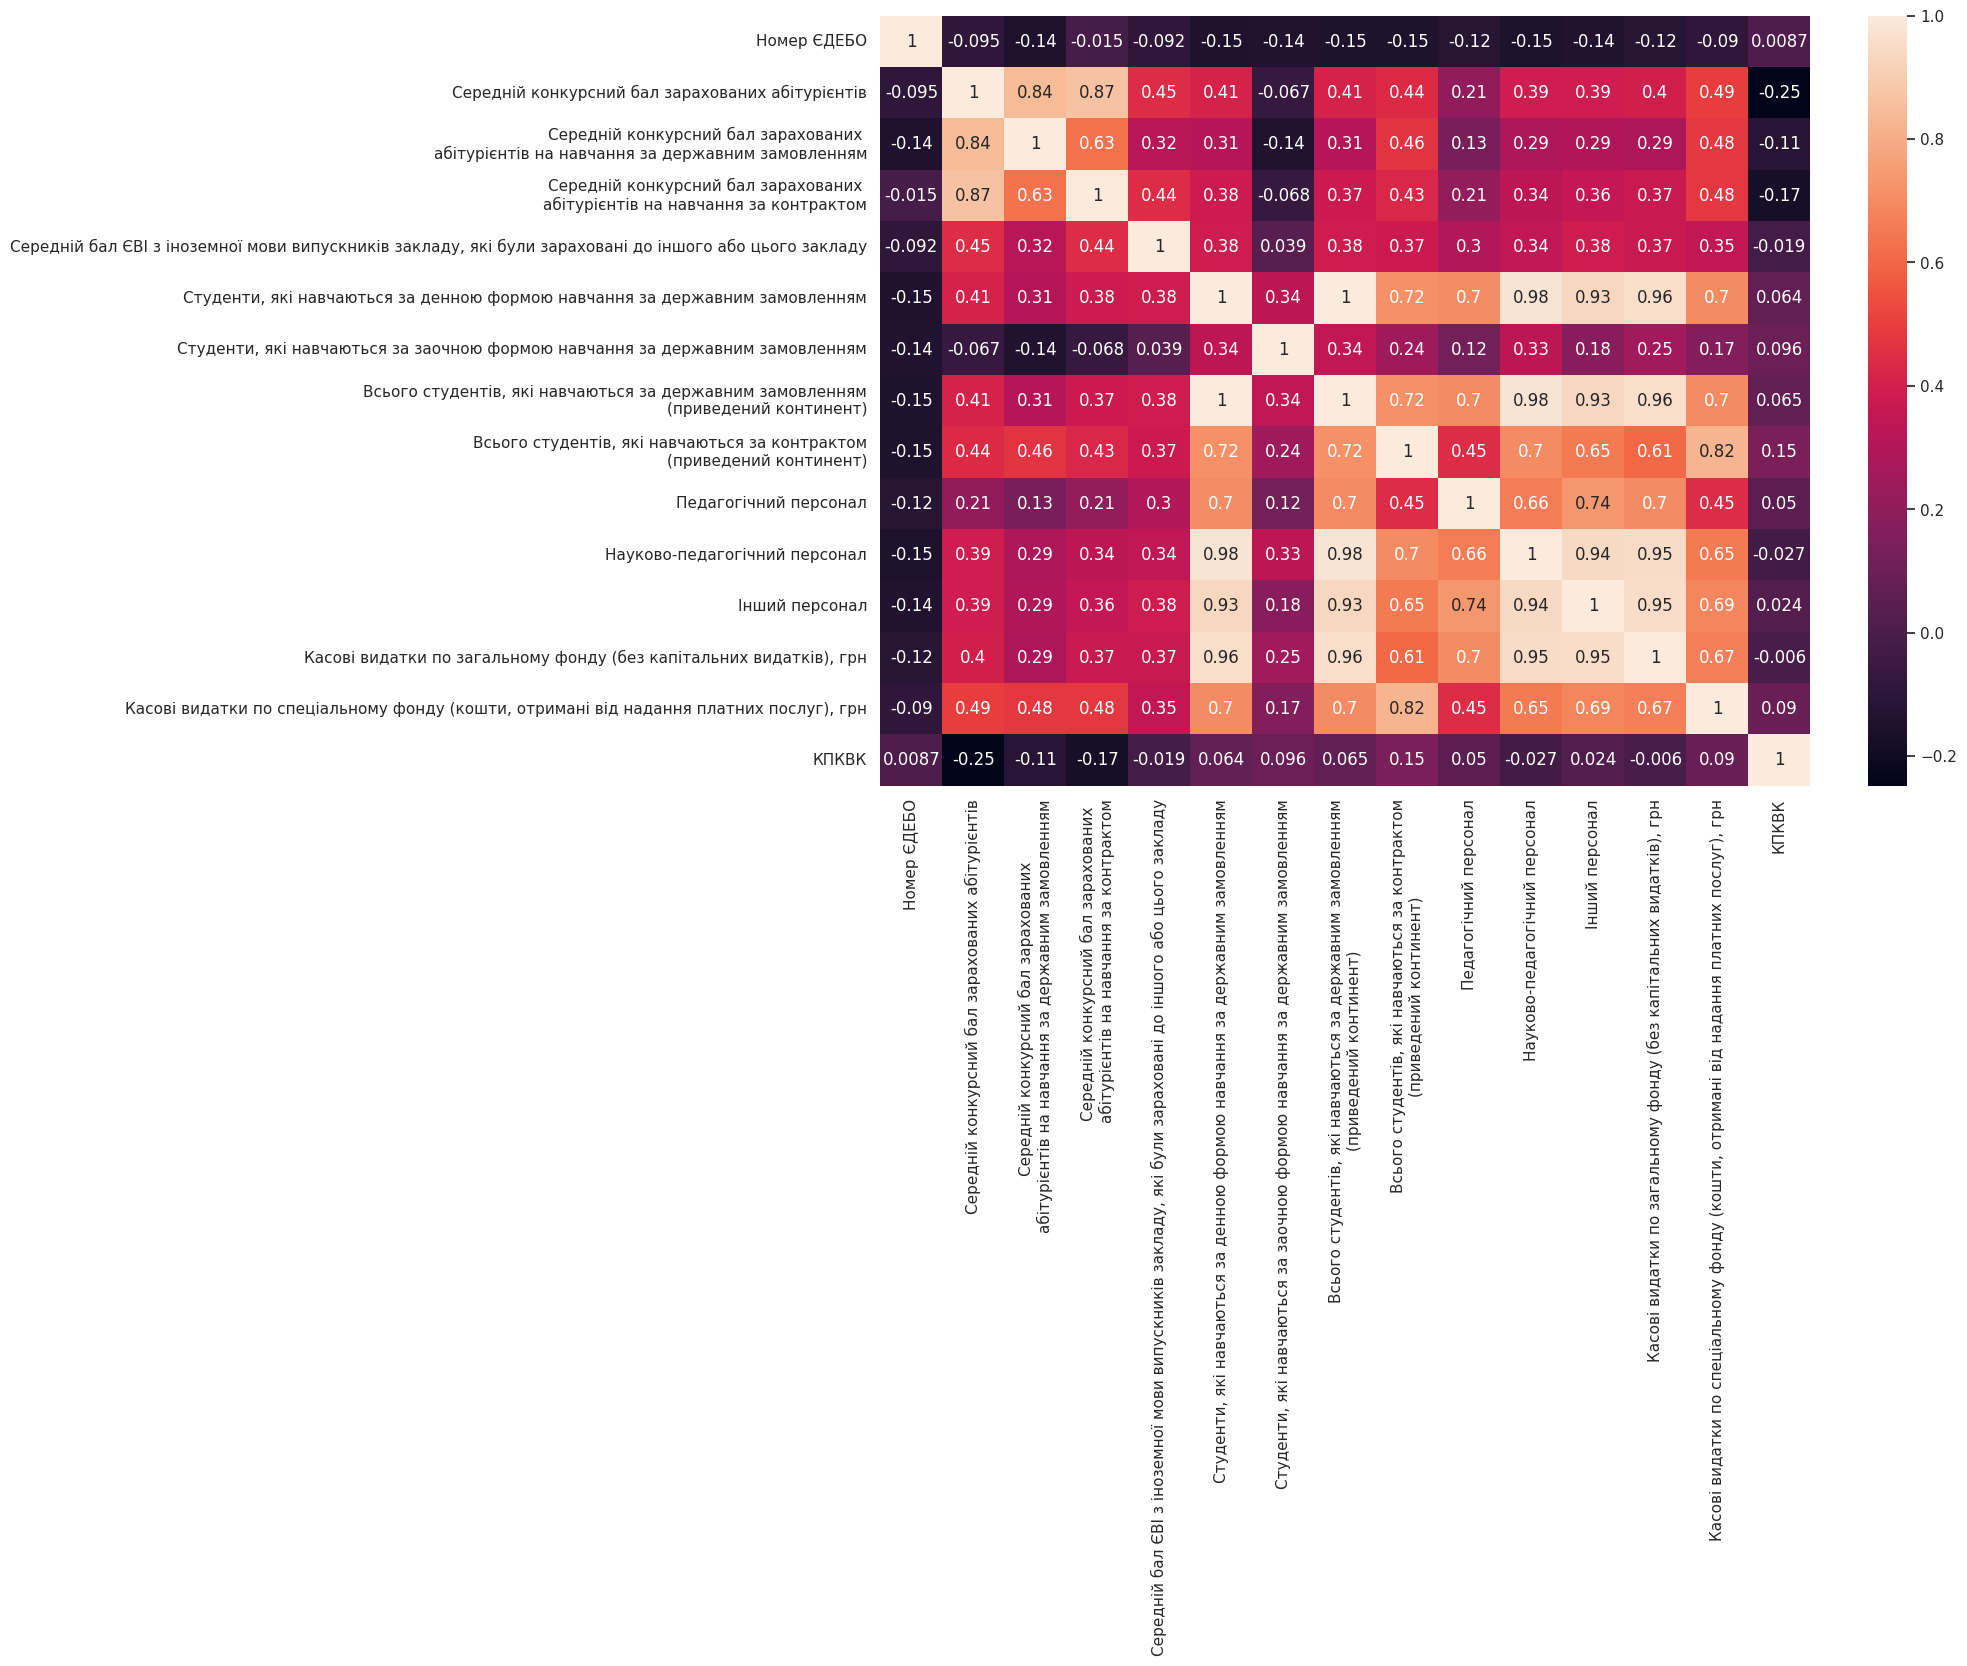

In [6]:

corr_matrix = df.select_dtypes(include='number').corr()
# Виберіть параметри з кореляцією більше 0.45 або менше -0.45 до параметра "price"
price_corr = corr_matrix['Середній конкурсний бал зарахованих абітурієнтів']
relevant_params = price_corr[(price_corr > 0.45) | (price_corr < -0.45)]
# Виведіть параметри та їх кореляцію з "price"
print(relevant_params)
# Створіть теплокарту кореляційної матриці
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [9]:

df.nunique()


Номер ЄДЕБО                                                                                                                                   142
Назва закладу вищої освіти                                                                                                                    142
Область                                                                                                                                        25
Середній конкурсний бал зарахованих абітурієнтів                                                                                              137
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням                                                       139
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом                                                                  139
Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або цього закладу                      

<Axes: xlabel='Середній конкурсний бал зарахованих абітурієнтів'>

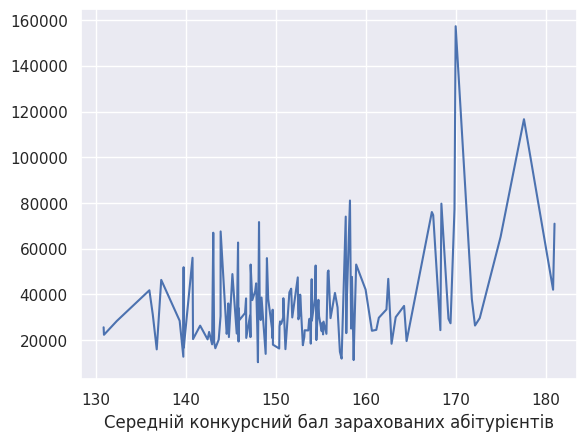

In [12]:

df.groupby('Середній конкурсний бал зарахованих абітурієнтів')['Середні  видатки на одного студента (приведений контингент) за контрактом'].mean().plot()



Графік показує середні видатки на одного студента (приведений контингент) за контрактом для різних груп за середнім конкурсним балом зарахованих абітурієнтів.

На графіку видно, що середні видатки на одного студента (приведений контингент) за контрактом збільшуються із зростанням середнього конкурсного балу зарахованих абітурієнтів. Це може бути пов'язано з тим, що в цих вузах вищий рівень вимог до вступу, і тому вони можуть залучати більш конкурентоспроможних абітурієнтів. Ці абітурієнти, як правило, мають більш високий рівень доходу, і тому вони можуть платити більше за навчання.

Ось кілька конкретних висновків, які можна зробити на основі цього графіка:

В цілому, середні видатки на одного студента (приведений контингент) за контрактом збільшуються із зростанням середнього конкурсного балу зарахованих абітурієнтів.
Ця тенденція є досить сильною, і вона спостерігається для всіх груп за середнім конкурсним балом зарахованих абітурієнтів.

<Axes: >

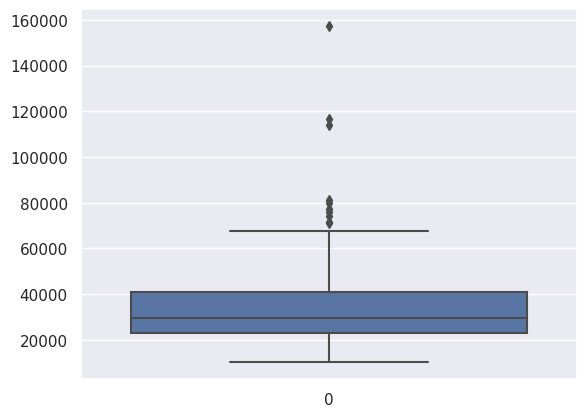

In [13]:
 sns.boxplot(df['Середні  видатки на одного студента (приведений контингент) за контрактом'])

<Axes: xlabel='Середній конкурсний бал зарахованих абітурієнтів'>

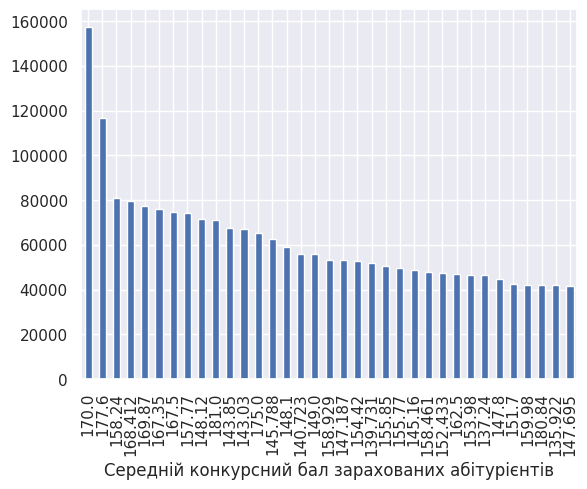

In [45]:
top_20_values = df.groupby('Середній конкурсний бал зарахованих абітурієнтів')['Середні  видатки на одного студента (приведений контингент) за контрактом'].mean().sort_values(ascending=False).head(35)
top_20_values.plot(kind='bar')



Залежність витрат на одного студента від середнього конкурсного балу зарахованого абітурієнта

(array([2., 1., 1., 1., 1., 4., 1., 5., 4., 4., 6., 5., 4., 7., 5., 3., 6.,
        7., 8., 5., 3., 2., 4., 2., 2., 2., 7., 1., 3., 3., 3., 0., 1., 0.,
        2., 2., 1., 1., 1., 1., 3., 1., 0., 2., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]),
 array([ 10330.43486641,  11380.45353386,  12430.47220131,  13480.49086876,
         14530.50953621,  15580.52820366,  16630.54687111,  17680.56553856,
         18730.58420601,  19780.60287346,  20830.62154091,  21880.64020836,
         22930.65887581,  23980.67754326,  25030.69621071,  26080.71487816,
         27130.73354561,  28180.75221305,  29230.7708805 ,  30

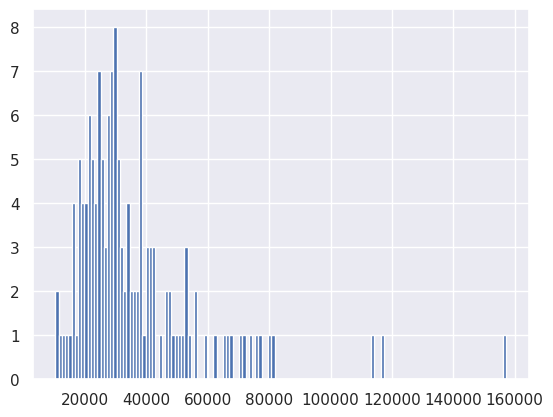

In [47]:
plt.hist(df['Середні  видатки на одного студента (приведений контингент) за контрактом'], bins=140)


Цей графік показує частотний розподіл середніх видатків на одного студента (приведений контингент) за контрактом. На основі цього графіка можна зробити такі висновки:

Більшість університетів мають середні видатки на одного студента за контрактом в діапазоні від 10 до 30 тисяч гривень. Цей діапазон є найпоширенішим і включає в себе близько 75% всіх університетів.
Є кілька університетів з дуже високими середніми видатками на одного студента за контрактом, які перевищують 50 тисяч гривень. Це, як правило, приватні університети або університети з високим рейтингом.
Є також кілька університетів з дуже низькими середніми видатками на одного студента за контрактом, які нижче 10 тисяч гривень. Це, як правило, державні університети в регіонах з низьким рівнем доходу.
На основі цих висновків можна зробити висновок, що середні видатки на одного студента за контрактом в Україні в цілому є відносно низькими. Це може бути пов'язано з тим, що в Україні ще донедавна переважали державні університети, які отримують фінансування від держави. Однак в останні роки в Україні спостерігається зростання кількості приватних університетів, які, як правило, мають вищі середні видатки на одного студента.

<Axes: xlabel='Середній конкурсний бал зарахованих абітурієнтів', ylabel='Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом'>

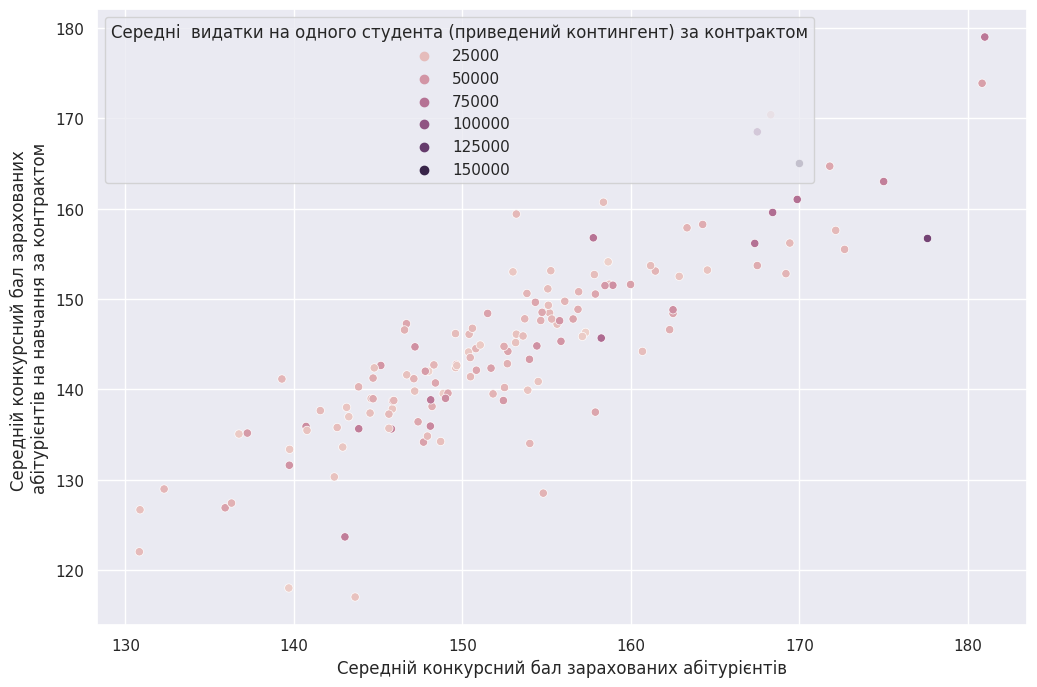

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Середній конкурсний бал зарахованих абітурієнтів',y='Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом',data=df,hue='Середні  видатки на одного студента (приведений контингент) за контрактом')


Графік показує залежність середнього конкурсного балу зарахованих абітурієнтів на навчання за контрактом від середнього конкурсного балу зарахованих абітурієнтів.

На графіку видно, що в цілому, чим вищий середній конкурсний бал зарахованих абітурієнтів, тим вищий середній конкурсний бал зарахованих абітурієнтів на навчання за контрактом. Однак, існує кілька відхилень від цієї загальної тенденції. Наприклад, є кілька точок, де середній конкурсний бал зарахованих абітурієнтів на навчання за контрактом вище середнього конкурсного балу зарахованих абітурієнтів. Це може бути пов'язано з тим, що в цих випадках у вузах були додаткові бюджетні місця, які були заповнені абітурієнтами з високими конкурсними балами.

Кольори на графіку вказують на середні видатки на одного студента (приведений контингент) за контрактом. Як видно з графіку, більш високі середні видатки на одного студента (приведений контингент) за контрактом, як правило, пов'язані з більш високим середнім конкурсним балом зарахованих абітурієнтів на навчання за контрактом. Це може бути пов'язано з тим, що в цих вузах вищий рівень вимог до вступу, і тому вони можуть залучати більш конкурентоспроможних абітурієнтів.

Ось кілька конкретних висновків, які можна зробити на основі цього графіка:

В цілому, чим вищий середній конкурсний бал зарахованих абітурієнтів, тим вищий середній конкурсний бал зарахованих абітурієнтів на навчання за контрактом.
Більш високі середні видатки на одного студента (приведений контингент) за контрактом, як правило, пов'язані з більш високим середнім конкурсним балом зарахованих абітурієнтів на навчання за контрактом.
Існує кілька відхилень від цієї загальної тенденції, які можуть бути пов'язані з додатковими бюджетними місцями або іншими факторами.

In [93]:
X_m = df[['Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням',
         'Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом',
         'Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або цього закладу']]
y_m = df['Середній конкурсний бал зарахованих абітурієнтів']

X_train_sm_m = sm.add_constant(X_m)
lr_m = sm.OLS(y_m, X_train_sm_m).fit()

lr_m.params

const                                                                                                     7.822112
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням                   0.419599
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом                              0.503974
Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або цього закладу    0.027668
dtype: float64


Результати логарифмічної регресії
                                           OLS Regression Results                                           
Dep. Variable:     Середній конкурсний бал зарахованих абітурієнтів   R-squared:                       0.897
Model:                                                          OLS   Adj. R-squared:                  0.895
Method:                                               Least Squares   F-statistic:                     401.8
Date:                                              Sat, 28 Oct 2023   Prob (F-statistic):           5.75e-68
Time:                                                      13:59:20   Log-Likelihood:                -361.89
No. Observations:                                               142   AIC:                             731.8
Df Residuals:                                                   138   BIC:                             743.6
Df Model:                                                         3                          

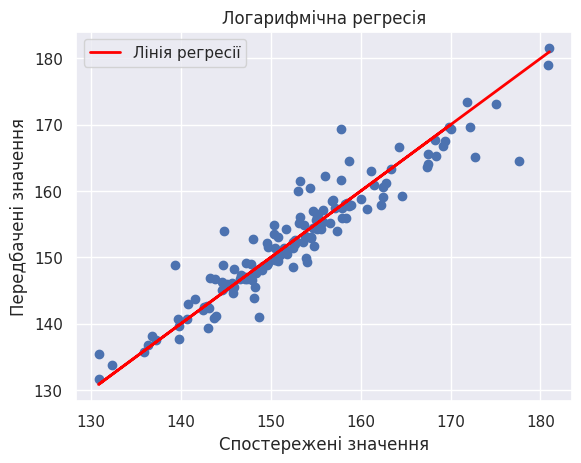

In [94]:
print("\nРезультати логарифмічної регресії")
print(lr_m.summary())
# Графік спостережених і передбачених значень
plt.scatter(y_m, lr_m.fittedvalues)
plt.xlabel('Спостережені значення')
plt.ylabel('Передбачені значення')
plt.title('Логарифмічна регресія')
# Вивід лінії регресії
plt.plot(y_m, y_m, color='red', linewidth=2, label='Лінія регресії')
plt.legend()
plt.show()

In [107]:
if (X_m['Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням'] == X_m['Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням'].astype(float)):
  print(True)


ValueError: ignored

Попередні значення (у логарифмічному вигляді):
0    61.616178
dtype: float64
Попередні значення (у звичайному вигляді):
0    5.748654e+26
dtype: float64


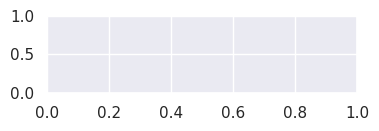

In [69]:

# Відомі значення незалежних змінних для нових спостережень (замініть це значення на реальні дані)
new_data = pd.DataFrame({
 'const': [7.8221], # Додаємо константу
 'Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням': [0.4196],
 'Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом': [0.5040],
 'Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або цього закладу': [0.0277]

})
# Передбачення на основі моделі логарифмічної регресії
predicted_prices = lr_m.predict(new_data)
# Виведення передбачених значень
print("Попередні значення (у логарифмічному вигляді):")
print(predicted_prices)
# Якщо ви хочете отримати результати у звичайному числовому вигляді (без логарифму), можете використовувати експонен
predicted_prices_exp = np.exp(predicted_prices)
print("Попередні значення (у звичайному вигляді):")
print(predicted_prices_exp)